In [1]:
import pandas as pd
from chart_studio import plotly 
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.offline as offline
from nltk.corpus import stopwords
from string import punctuation
import numpy as np
from nltk.tokenize import word_tokenize
from gensim import corpora, models, similarities
from collections import OrderedDict
import seaborn as sns
import pyLDAvis.gensim

# Install gensim

In [35]:
!pip install --upgrade --default-timeout=1000 gensim --user

  Using cached gensim-3.8.3-cp36-cp36m-win_amd64.whl (24.2 MB)
  Using cached Cython-0.29.14-cp36-cp36m-win_amd64.whl (1.7 MB)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [33]:
!pip --version

pip 20.2.3 from C:\Users\Mahsa\AppData\Roaming\Python\Python36\site-packages\pip (python 3.6)



Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


# Import Data

In [2]:
dataset = pd.read_csv('Data/ForTopicClustering.csv')

In [3]:
AllTweets = dataset[['Text', 'Date']]
AllTweets

Text  \
0      Man I tried. I had a gal lined up to join Mili...   
1      My grandmother requires 24/7 supervision due t...   
2      I know a doctor who told me that the flu shot ...   
3      They are doing an intervention for an obese wo...   
4      I cry too, my 92 year old mum with advanced de...   
5      Now that covid has killed my mom I am going to...   
6      I see that "zero Covid strategy" is now the bu...   
7      This shows the best analysis of the actual imp...   
8      When they did get cases, they stopped all visi...   
9                  this is me because of COVID dementia    
10     No that information is incorrect. The UK has l...   
11     How exactly has a vet’s job changed since Covi...   
12     It’s actually the normal way of recording deat...   
13     Take a look at CD’s Table 3 and you will see t...   
14     @BillGates has pledged to give away 2/3 of his...   
15     Depends on the comorbidities. When I see them ...   
16     He’s always been stupid. Now sadly he’s stupid...   
17     My friends nan had dementia for ages and she w...   
18     Our loved ones bring thrown out their covid fr...   
19     Might help them not get dementia but gonna do ...   
20     No just "exposed" to covid so quarantine is ne...   
21     Still working 40 hours a week in a care home. ...   
22     Watched another heart breaking story of dement...   
23     Zero Covid, but a few hundred thousand deaths ...   
24     It's about Labor UNIONS. You know the thing th...   
25     My mum received the covid virus as a free gift...   
26     Facts: Such claims misrepresent the data. A de...   
27     Really cross to be told my mum - dementia and ...   
28     “They require care for all their waking hours,...   
29     Or live alone with dementia and all the troubl...   
...                                                  ...   
14819    Maybe he has dementia with corona complications   
14820  Next week #diversealzthurs we chat viruses (Co...   
14821  Blame himself for the Coronavirus? Uhhh. Poor ...   
14822  This was in response to Dr. Gupta trying to ex...   
14823  "Did you know; the coronavirus vaccine causes ...   
14824  You're have depression, dementia, AIDS, Ebola,...   
14825  annoying sibling poking at you constantly "Mar...   
14826  Henry Moreno Passes Away Longtime California t...   
14827  The drugs are quickly eating away at the last ...   
14828  How stupid and morally retarded you supposed t...   
14829  Do you really think Dementia Rump is going to ...   
14830  I spent 7 hours at Ashford Hospital last night...   
14831  The first corona virus patient is a 70 year ol...   
14832  I'm not worried about the corona virus. I've s...   
14833  Lice are worse than bedbugs? Roaches worse tha...   
14834  Ok, the dementia has taken hold! It’s time for...   
14835  WITH CORONA ON THE LOOSE WE CANT AFFORD TO HAV...   
14836  Don't worry, just like Camel urine is very fam...   
14837  If any Republicans get this they could be quar...   
14838  So happy for you. For a man of your reputation...   
14839  A New Dawn of arson has engulfed SA with billi...   
14840  Yup Corona virus hasn’t stopped heart attacks,...   
14841  Breaking News: Hidden from the people an epide...   
14842  Is dementia contagious? Is there a dementia co...   
14843  Three Stooges In "Killer Corona Cutups". Hey! ...   
14844                          I'd rather drink corona..   
14845  Don’t know about this corona virus, think we h...   
14846  Nothing to do with sin. Explain how sin causes...   
14847  Meat "cooked" the style of 1 (and especially -...   
14848  The syphilitic worms eating his dried out spon...   

                            Date  
0      2020-09-07 23:35:38+00:00  
1      2020-09-07 23:30:59+00:00  
2      2020-09-07 23:27:03+00:00  
3      2020-09-07 23:17:45+00:00  
4      2020-09-07 22:53:16+00:00  
5      2020-09-07 22:27:52+00:00  
6      2020-09-07 22:17:28+00:00  
7      2020-09-07 21:58:13+00:00  
8      2020-09-0

# Plot Count of Tweets/Day

In [86]:
# AllTweets['Time'] = AllTweets['Date'].split(' ')[0]
AllTweets['Time'] = [x.split(' ')[0] for x in AllTweets['Date']]
AllTweets

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text  \
0      @BullandFox Bull said today that Seaver died a...   
1      The other day I had a senior patient with vasc...   
2      Not sure yr humor is coming across but I also ...   
3      National Baseball Hall of Fame pitcher Tom Sea...   
4      Tom Seaver was diagnosed with dementia last ye...   
5      He needs to be tested for COVID-19 but #JoeBid...   
6      The grotesque propaganda is ubiquitous-ex.1mil...   
7      Seaver was diagnosed with Lyme disease in 1991...   
8      Tom Seaver, a Hall of Fame pitcher who helped ...   
9      He is old and has dementia if he gets COVID it...   
10     Hall of Fame pitcher Tom Seaver died from comp...   
11                                  Tested for dementia?   
12     The baseball world is tipping its cap to Hall ...   
13     Remember when Swine Flu had 50,000,000 more ca...   
14     The man had dementia. It’s a shame that he’s g...   
15     Mets' Tom Seaver dies at 75 from complications...   
16     That is correct, he passed from complications ...   
17     @nbcnews sportscaster just said that Seaver di...   
18     In Long Term Care where there is Covid the res...   
19     How can you prepare to take care of a sick spo...   
20     @JohnChandlerNBC Seaver reportedly died of dem...   
21     my dad died jan 3;“dementia complications”.was...   
22     KayLIE shows up for work every day not wearing...   
23     Announced today: Tom Seaver has passed away fr...   
24     MLB Legend Tom Seaver Dead At 75 After Battle ...   
25     You also believe: * Mexico would pay for a wal...   
26     Maybe Republican baseball fans will take #Covi...   
27     COVID and dementia: Tom Seaver, Pitcher Who Le...   
28     The passing of ‘Fresno’s icon’: Hall of Famer ...   
29     Seaver passed away from "complications of Lewy...   
...                                                  ...   
21627  annoying sibling poking at you constantly "Mar...   
21628  Henry Moreno Passes Away Longtime California t...   
21629  The drugs are quickly eating away at the last ...   
21630  How stupid and morally retarded you supposed t...   
21631  Do you really think Dementia Rump is going to ...   
21632  I spent 7 hours at Ashford Hospital last night...   
21633  The first corona virus patient is a 70 year ol...   
21634  I'm not worried about the corona virus. I've s...   
21635  Lice are worse than bedbugs? Roaches worse tha...   
21636  Ok, the dementia has taken hold! It’s time for...   
21637  WITH CORONA ON THE LOOSE WE CANT AFFORD TO HAV...   
21638  Don't worry, just like Camel urine is very fam...   
21639  If any Republicans get this they could be quar...   
21640  So happy for you. For a man of your reputation...   
21641  #BoycottTrump #BoycottRacistTrump #BoycottKrem...   
21642  Reminder America ... The Liar-In-Chief Donnie ...   
21643  A New Dawn of arson has engulfed SA with billi...   
21644  The corona virus increases the absolute risk t...   
21645  The corona virus increases the absolute risk t...   
21646  Yup Corona virus hasn’t stopped heart attacks,...   
21647  Breaking News: Hidden from the people an epide...   
21648  Is dementia contagious? Is there a dementia co...   
21649  Three Stooges In "Killer Corona Cutups". Hey! ...   
21650                          I'd rather drink corona..   
21651  Now, now. You could have asked for witnesses. ...   
21652  Don’t know about this corona virus, think we h...   
21653  Nothing to do with sin. Explain how sin causes...   
21654  Meat "cooked" the style of 1 (and especially -...   
21655  The syphilitic worms eating his dried out spon...   
21656  We are honey, i’m afraid your papa has been ad...   

                            Date        Time  
0      2020-09-03 23:57:39+00:00  2020-09-03  
1      2020-09-03 23:49:04+00:00  2020-09-03  
2      2020-09-03 23:36:54+00:00  2020-09-03  
3      2020-09-03 23:31:12+00:00  2020-09-03  
4      2020-09-03 23:27:44+00:00  2020-09-03  
5      2020-09-03 23:25:13+00:00  2020-09-03  
6 

In [64]:
# plotly.offline.init_notebook_mode()
tweetsT = pd.to_datetime(AllTweets['Time'], format='%Y-%m-%d')
# tweetsT = AllTweets['Time']

trace = go.Histogram(
    x=tweetsT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Tweet Activity Over Days',
    height=450,
    width=1000,
    xaxis=dict(
        title='Month and year'
    ),
    yaxis=dict(
        title='Tweet Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

# Plot Count of Tweets/Month

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



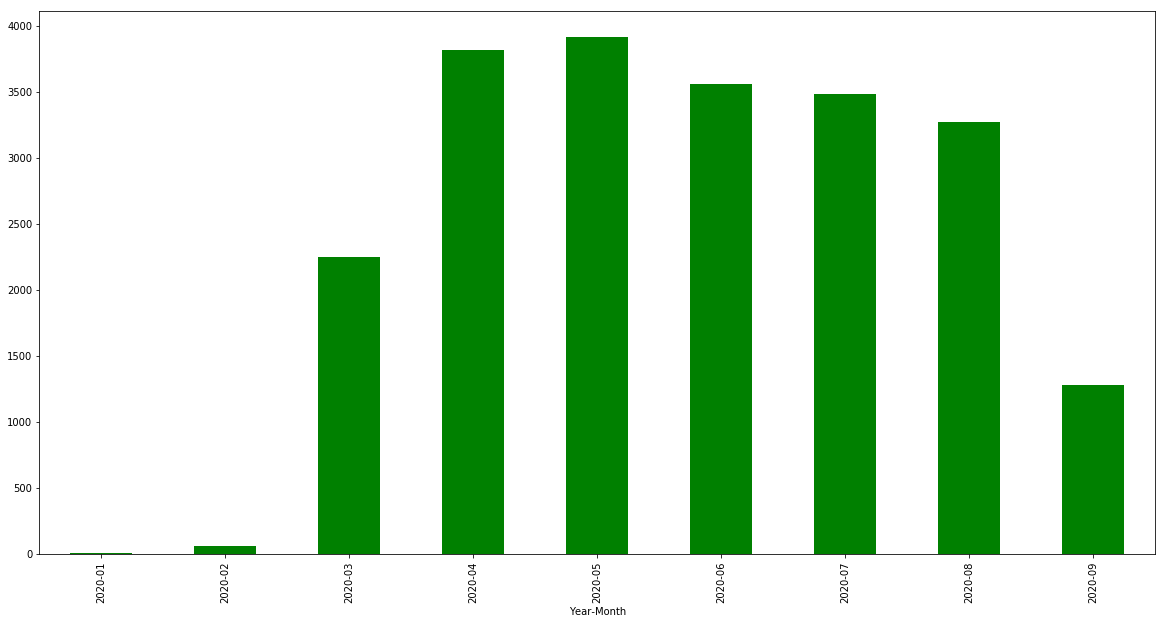

In [87]:
plt.figure(figsize=(20,10))
AllTweets['Year-Month'] = [x[:-3] for x in AllTweets['Time']]
AllTweets.groupby(['Year-Month'])['Year-Month'].count().plot(kind='bar', color='g')

In [63]:
# plotly.offline.init_notebook_mode()
tweetsT = pd.to_datetime(AllTweets['Year-Month'], format='%Y-%m')
# tweetsT = AllTweets['Time']

trace = go.Histogram(
    x=tweetsT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Tweet Activity Over Months',
    height=450,
    width=1000,
    xaxis=dict(
        title='Month and year'
    ),
    yaxis=dict(
        title='Tweet Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

# Data Preprocessing

## Remove duplicate tweets

In [4]:
print(len(AllTweets))
AllTweets.drop_duplicates(['Text'], inplace=True)
print(len(AllTweets))

14849
14849


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [91]:
http.iloc[ 8  , : ]['Text']

'The passing of ‘Fresno’s icon’: Hall of Famer Tom Seaver dies from dementia, COVID-19 https://trib.al/DZfEFEh'

## Lowercase the tweets

In [5]:
AllTweets['Text'] = [x.lower() for x in AllTweets['Text']]
AllTweets

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text  \
0      man i tried. i had a gal lined up to join mili...   
1      my grandmother requires 24/7 supervision due t...   
2      i know a doctor who told me that the flu shot ...   
3      they are doing an intervention for an obese wo...   
4      i cry too, my 92 year old mum with advanced de...   
5      now that covid has killed my mom i am going to...   
6      i see that "zero covid strategy" is now the bu...   
7      this shows the best analysis of the actual imp...   
8      when they did get cases, they stopped all visi...   
9                  this is me because of covid dementia    
10     no that information is incorrect. the uk has l...   
11     how exactly has a vet’s job changed since covi...   
12     it’s actually the normal way of recording deat...   
13     take a look at cd’s table 3 and you will see t...   
14     @billgates has pledged to give away 2/3 of his...   
15     depends on the comorbidities. when i see them ...   
16     he’s always been stupid. now sadly he’s stupid...   
17     my friends nan had dementia for ages and she w...   
18     our loved ones bring thrown out their covid fr...   
19     might help them not get dementia but gonna do ...   
20     no just "exposed" to covid so quarantine is ne...   
21     still working 40 hours a week in a care home. ...   
22     watched another heart breaking story of dement...   
23     zero covid, but a few hundred thousand deaths ...   
24     it's about labor unions. you know the thing th...   
25     my mum received the covid virus as a free gift...   
26     facts: such claims misrepresent the data. a de...   
27     really cross to be told my mum - dementia and ...   
28     “they require care for all their waking hours,...   
29     or live alone with dementia and all the troubl...   
...                                                  ...   
14819    maybe he has dementia with corona complications   
14820  next week #diversealzthurs we chat viruses (co...   
14821  blame himself for the coronavirus? uhhh. poor ...   
14822  this was in response to dr. gupta trying to ex...   
14823  "did you know; the coronavirus vaccine causes ...   
14824  you're have depression, dementia, aids, ebola,...   
14825  annoying sibling poking at you constantly "mar...   
14826  henry moreno passes away longtime california t...   
14827  the drugs are quickly eating away at the last ...   
14828  how stupid and morally retarded you supposed t...   
14829  do you really think dementia rump is going to ...   
14830  i spent 7 hours at ashford hospital last night...   
14831  the first corona virus patient is a 70 year ol...   
14832  i'm not worried about the corona virus. i've s...   
14833  lice are worse than bedbugs? roaches worse tha...   
14834  ok, the dementia has taken hold! it’s time for...   
14835  with corona on the loose we cant afford to hav...   
14836  don't worry, just like camel urine is very fam...   
14837  if any republicans get this they could be quar...   
14838  so happy for you. for a man of your reputation...   
14839  a new dawn of arson has engulfed sa with billi...   
14840  yup corona virus hasn’t stopped heart attacks,...   
14841  breaking news: hidden from the people an epide...   
14842  is dementia contagious? is there a dementia co...   
14843  three stooges in "killer corona cutups". hey! ...   
14844                          i'd rather drink corona..   
14845  don’t know about this corona virus, think we h...   
14846  nothing to do with sin. explain how sin causes...   
14847  meat "cooked" the style of 1 (and especially -...   
14848  the syphilitic worms eating his dried out spon...   

                            Date  
0      2020-09-07 23:35:38+00:00  
1      2020-09-07 23:30:59+00:00  
2      2020-09-07 23:27:03+00:00  
3      2020-09-07 23:17:45+00:00  
4      2020-09-07 22:53:16+00:00  
5      2020-09-07 22:27:52+00:00  
6      2020-09-07 22:17:28+00:00  
7      2020-09-07 21:58:13+00:00  
8      2020-09-0

# Remove stopwords and punctuation

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mahsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
corpus = AllTweets['Text'].tolist()
tokenizer = nltk.RegexpTokenizer(r"\w+")
# nopunc = tokenizer.tokenize(raw_text)
# word_tokens = word_tokenize(AllTweets['Text'].tolist()[0])
# word_tokens
# text = word_tokenize("The quick brown fox jumps over the lazy dog")
# text
numbers = '1234567890'
stoplist = stopwords.words('english') + list(punctuation) + list(numbers)

texts = [[word for word in tokenizer.tokenize(str(document)) if word not in stoplist] for document in corpus]

In [19]:
texts[8]

['get',
 'cases',
 'stopped',
 'visits',
 'including',
 'via',
 'window',
 'mom',
 'dementia',
 'advanced',
 'full',
 'month',
 'visits',
 'get',
 'words',
 'largely',
 'oblivious',
 'seriousness',
 'covid',
 'thinks',
 'leave']

In [14]:
AllTweets['Text'].tolist()[8]

'when they did get cases, they stopped all visits, including via window. mom’s dementia has advanced. that was about a full month of no visits. she doesn’t get more than a few words out. she’s largely oblivious to the seriousness of covid and thinks she’ll leave.'

In [15]:
word_tokens = word_tokenize(AllTweets['Text'].tolist()[8])
word_tokens

['when',
 'they',
 'did',
 'get',
 'cases',
 ',',
 'they',
 'stopped',
 'all',
 'visits',
 ',',
 'including',
 'via',
 'window',
 '.',
 'mom',
 '’',
 's',
 'dementia',
 'has',
 'advanced',
 '.',
 'that',
 'was',
 'about',
 'a',
 'full',
 'month',
 'of',
 'no',
 'visits',
 '.',
 'she',
 'doesn',
 '’',
 't',
 'get',
 'more',
 'than',
 'a',
 'few',
 'words',
 'out',
 '.',
 'she',
 '’',
 's',
 'largely',
 'oblivious',
 'to',
 'the',
 'seriousness',
 'of',
 'covid',
 'and',
 'thinks',
 'she',
 '’',
 'll',
 'leave',
 '.']

In [16]:
word_tokens = tokenizer.tokenize(AllTweets['Text'].tolist()[8])
word_tokens

['when',
 'they',
 'did',
 'get',
 'cases',
 'they',
 'stopped',
 'all',
 'visits',
 'including',
 'via',
 'window',
 'mom',
 's',
 'dementia',
 'has',
 'advanced',
 'that',
 'was',
 'about',
 'a',
 'full',
 'month',
 'of',
 'no',
 'visits',
 'she',
 'doesn',
 't',
 'get',
 'more',
 'than',
 'a',
 'few',
 'words',
 'out',
 'she',
 's',
 'largely',
 'oblivious',
 'to',
 'the',
 'seriousness',
 'of',
 'covid',
 'and',
 'thinks',
 'she',
 'll',
 'leave']

In [21]:
corpus

['man i tried. i had a gal lined up to join military intelligence then covid hit, they delayed her enlistment, her army nurse sister talked her out of it. so i’m chipping in to help her finish her bsn while she works at a dementia care facility. she’ll be an amazing nurse i’m sure.',
 "my grandmother requires 24/7 supervision due to her dementia. the healthcare worker who is supposed to assist this evening just got back from out of state travel to a large funeral. the coordinating care facility's response to our concern is that you can catch covid anywhere. 🙄",
 'i know a doctor who told me that the flu shot causes dementia. and, if we let them jab us once for covid, this allowance could turn into a mandated, yearly, adult vaccine.',
 'they are doing an intervention for an obese women that covid would love to invade and a senior with dementia. how did the intervention work out @richhiggins_dc ?',
 'i cry too, my 92 year old mum with advanced dementia, i’ve not seen since sept. my famil

In [20]:
texts

[['man',
  'tried',
  'gal',
  'lined',
  'join',
  'military',
  'intelligence',
  'covid',
  'hit',
  'delayed',
  'enlistment',
  'army',
  'nurse',
  'sister',
  'talked',
  'chipping',
  'help',
  'finish',
  'bsn',
  'works',
  'dementia',
  'care',
  'facility',
  'amazing',
  'nurse',
  'sure'],
 ['grandmother',
  'requires',
  '24',
  'supervision',
  'due',
  'dementia',
  'healthcare',
  'worker',
  'supposed',
  'assist',
  'evening',
  'got',
  'back',
  'state',
  'travel',
  'large',
  'funeral',
  'coordinating',
  'care',
  'facility',
  'response',
  'concern',
  'catch',
  'covid',
  'anywhere'],
 ['know',
  'doctor',
  'told',
  'flu',
  'shot',
  'causes',
  'dementia',
  'let',
  'jab',
  'us',
  'covid',
  'allowance',
  'could',
  'turn',
  'mandated',
  'yearly',
  'adult',
  'vaccine'],
 ['intervention',
  'obese',
  'women',
  'covid',
  'would',
  'love',
  'invade',
  'senior',
  'dementia',
  'intervention',
  'work',
  'richhiggins_dc'],
 ['cry',
  '92',


In [39]:
dictionary = corpora.Dictionary(texts)
print(dictionary)

Dictionary(23582 unique tokens: ['amazing', 'army', 'bsn', 'care', 'chipping']...)


In [40]:
print(dictionary.token2id)

{'amazing': 0, 'army': 1, 'bsn': 2, 'care': 3, 'chipping': 4, 'covid': 5, 'delayed': 6, 'dementia': 7, 'enlistment': 8, 'facility': 9, 'finish': 10, 'gal': 11, 'help': 12, 'hit': 13, 'intelligence': 14, 'join': 15, 'lined': 16, 'man': 17, 'military': 18, 'nurse': 19, 'sister': 20, 'sure': 21, 'talked': 22, 'tried': 23, 'works': 24, '24': 25, 'anywhere': 26, 'assist': 27, 'back': 28, 'catch': 29, 'concern': 30, 'coordinating': 31, 'due': 32, 'evening': 33, 'funeral': 34, 'got': 35, 'grandmother': 36, 'healthcare': 37, 'large': 38, 'requires': 39, 'response': 40, 'state': 41, 'supervision': 42, 'supposed': 43, 'travel': 44, 'worker': 45, 'adult': 46, 'allowance': 47, 'causes': 48, 'could': 49, 'doctor': 50, 'flu': 51, 'jab': 52, 'know': 53, 'let': 54, 'mandated': 55, 'shot': 56, 'told': 57, 'turn': 58, 'us': 59, 'vaccine': 60, 'yearly': 61, 'intervention': 62, 'invade': 63, 'love': 64, 'obese': 65, 'richhiggins_dc': 66, 'senior': 67, 'women': 68, 'work': 69, 'would': 70, '92': 71, 'advan

In [41]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [42]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1)],
 [(3, 1),
  (5, 1),
  (7, 1),
  (9, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1)],
 [(5, 1),
  (7, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1)],
 [(5, 1),
  (7, 1),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1)],
 [(5, 1),
  (7, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (8

# Creating a transformation

In [43]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

In [45]:
print(tfidf)

TfidfModel(num_docs=14849, num_nnz=281955)


In [46]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

# LDA (Latent Dirichlet Allocation)

In [51]:
total_topics = 10

In [52]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf

In [53]:
#Show first n important word in the topics:
lda.show_topics(total_topics,5)

[(0,
  '0.064*"dementia" + 0.050*"covid" + 0.033*"19" + 0.021*"people" + 0.018*"care"'),
 (1,
  '0.045*"dementia" + 0.031*"covid" + 0.009*"virus" + 0.008*"seriously" + 0.007*"die"'),
 (2,
  '0.052*"dementia" + 0.036*"covid" + 0.015*"19" + 0.014*"home" + 0.010*"care"'),
 (3,
  '0.039*"dementia" + 0.026*"covid" + 0.009*"help" + 0.009*"caregiving" + 0.009*"beat"'),
 (4,
  '0.013*"funny" + 0.013*"dead" + 0.012*"media" + 0.012*"million" + 0.010*"dementia"'),
 (5,
  '0.073*"dementia" + 0.043*"corona" + 0.037*"covid" + 0.030*"19" + 0.020*"virus"'),
 (6,
  '0.051*"dementia" + 0.034*"corona" + 0.030*"home" + 0.027*"covid" + 0.019*"care"'),
 (7,
  '0.040*"dementia" + 0.027*"covid" + 0.012*"mom" + 0.009*"home" + 0.008*"early"'),
 (8,
  '0.088*"corona" + 0.050*"dementia" + 0.029*"virus" + 0.023*"covid" + 0.010*"19"'),
 (9,
  '0.053*"dementia" + 0.045*"covid" + 0.020*"19" + 0.019*"death" + 0.015*"heart"')]

In [56]:
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
#data_lda

In [57]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(10, 156)


In [58]:
df_lda

19       age       ago  although  alzheimer  alzheimers      away  \
0  0.032549  0.000000  0.000000  0.000000   0.003675    0.000000  0.000000   
1  0.006281  0.000000  0.000000  0.003663   0.000000    0.000000  0.000000   
2  0.015320  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   
3  0.006113  0.000000  0.000000  0.000000   0.000000    0.007919  0.004158   
4  0.000000  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   
5  0.030467  0.000000  0.000000  0.000000   0.005834    0.000000  0.000000   
6  0.010503  0.000000  0.005998  0.000000   0.000000    0.000000  0.000000   
7  0.007952  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   
8  0.009744  0.000000  0.000000  0.000000   0.000000    0.000000  0.000000   
9  0.019923  0.004411  0.000000  0.000000   0.000000    0.000000  0.000000   

       beat      beer    bernie    ...        visit      vote     week  \
0  0.000000  0.000000  0.000000    ...     0.000000  0.000000  0.00000   
1  0.000000  0.004448  0.000000    ...     0.000000  0.005685  0.00000   
2  0.000000  0.000000  0.000000    ...     0.000000  0.000000  0.00618   
3  0.008583  0.000000  0.006923    ...     0.000000  0.000000  0.00000   
4  0.000000  0.000000  0.000000    ...     0.000000  0.000000  0.00000   
5  0.000000  0.000000  0.000000    ...     0.000000  0.000000  0.00000   
6  0.000000  0.000000  0.000000    ...     0.008105  0.000000  0.00000   
7  0.000000  0.000000  0.000000    ...     0.000000  0.000000  0.00000   
8  0.000000  0.000000  0.000000    ...     0.000000  0.000000  0.00000   
9  0.000000  0.000000  0.000000    ...     0.000000  0.000000  0.00000   

    weekend     weeks      work     would     write      year     years  
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.000000  0.000000  0.000000  0.006505  0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.006804  0.000000  
3  0.005614  0.000000  0.000000  0.000000  0.003735  0.000000  0.000000  
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
5  0.000000  0.000000  0.000000  0.003852  0.000000  0.000000  0.000000  
6  0.000000  0.004715  0.000000  0.000000  0.000000  0.000000  0.000000  
7  0.000000  0.000000  0.004402  0.000000  0.000000  0.000000  0.000000  
8  0.000000  0.000000  0.000000  0.000000  0.000000  0.003765  0.000000  
9  0.000000  0.000000  0.000000  0.000000  0.000000  0.004169  0.004439  

[10 rows x 156 columns]

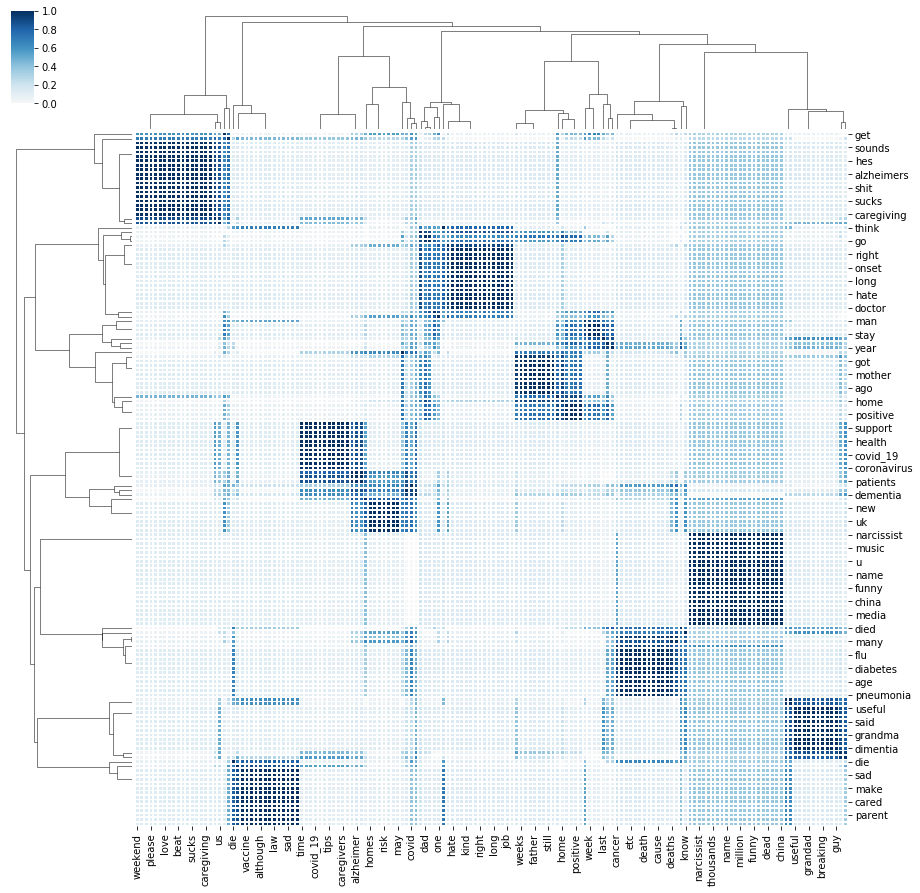

In [60]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [69]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
3     -63.964081  12.333292       1        1  24.366158
0     -21.322962 -68.706070       2        1  20.058392
2      24.997561  35.363365       3        1  13.896995
6      51.684151  -7.516317       4        1   7.425989
5     -71.959160 -41.524422       5        1   5.777351
9      28.843084 -60.749481       6        1   5.715870
4     -32.321491 -24.785799       7        1   5.712231
1       9.970520 -21.219036       8        1   5.683011
7     -14.290513  13.598160       9        1   5.682174
8     -29.743263  53.842747      10        1   5.681828, topic_info=     Category        Freq         Term       Total  loglift  logprob
term                                                                
4132  Default  167.000000       corona  167.000000  30.0000  30.0000
7     Default  726.000000     dementia  726.000000  29.0000  29.0000
5     Default  490.000000        covid  490.000000  28.0000  28.0000
218   Default  227.000000           19  227.000000  27.0000  27.0000
351   Default   89.000000        virus   89.000000  26.0000  26.0000
82    Default  106.000000         home  106.000000  25.0000  25.0000
3     Default  123.000000         care  123.000000  24.0000  24.0000
87    Default  111.000000       people  111.000000  23.0000  23.0000
165   Default   30.000000        death   30.000000  22.0000  22.0000
3526  Default   31.000000         beat   31.000000  21.0000  21.0000
134   Default   33.000000       deaths   33.000000  20.0000  20.0000
2148  Default   32.000000   caregiving   32.000000  19.0000  19.0000
105   Default   35.000000          mom   35.000000  18.0000  18.0000
85    Default   45.000000      nursing   45.000000  17.0000  17.0000
239   Default   33.000000          dad   33.000000  16.0000  16.0000
116   Default   23.000000        heart   23.000000  15.0000  15.0000
113   Default   22.000000      disease   22.000000  14.0000  14.0000
3553  Default   11.000000        funny   11.000000  13.0000  13.0000
893   Default   16.000000      million   16.000000  12.0000  12.0000
5100  Default   29.000000       bernie   29.000000  11.0000  11.0000
112   Default   26.000000       cancer   26.000000  10.0000  10.0000
86    Default   44.000000          old   44.000000   9.0000   9.0000
916   Default   16.000000         dead   16.000000   8.0000   8.0000
1729  Default   13.000000        media   13.000000   7.0000   7.0000
347   Default   37.000000     hospital   37.000000   6.0000   6.0000
1537  Default   16.000000  coronavirus   16.000000   5.0000   5.0000
166   Default   44.000000         died   44.000000   4.0000   4.0000
84    Default   26.000000          mum   26.000000   3.0000   3.0000
233   Default   34.000000   alzheimers   34.000000   2.0000   2.0000
506   Default   21.000000      weekend   21.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
351   Topic10   24.206190        virus   89.282707   1.5627  -3.5512
1588  Topic10    2.142411      showing    2.962960   2.5436  -5.9759
2368  Topic10    2.006162     absolute    2.724885   2.5617  -6.0416
464   Topic10    2.054208        sleep    2.898294   2.5237  -6.0179
683   Topic10    3.630282     dimentia    7.675810   2.1191  -5.4485
1441  Topic10    3.104347        guess    6.137796   2.1862  -5.6050
7     Topic10   42.141499     dementia  726.255798   0.0210  -2.9968
993   Topic10    3.610636          guy    8.357280   2.0286  -5.4539
3217  Topic10    2.797464        spent    5.874681   2.1260  -5.7091
819   Topic10    5.052640    suffering   20.981789   1.4442  -5.1179
629   Topic10    3.945251     probably   12.903449   1.6829  -5.3653
5     Topic10   18.988304        covid  490.790924  -0.3843  -3.7940
982   Topic10    2.337383        masks    4.393761   2.2367  -5.8888
711   Topic10    3.834949      grandma   15.648256   1.4617  -5.3936
505   Topic10    2.544773       stages    

# New Method

<b>Source:</b> https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

## Import libraries

In [8]:
# import re
# import numpy as np
# import pandas as pd
from pprint import pprint

# # Gensim
import gensim
# import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# # spacy for lemmatization
# import spacy
import en_core_web_sm

# # Plotting tools
# import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
# import matplotlib.pyplot as plt
# %matplotlib inline

# Enable logging for gensim - optional
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# import warnings
# warnings.filterwarnings("ignore",category=DeprecationWarning)

## Tokenize words and Clean-up text

In [9]:
# corpus = AllTweets['Text'].tolist()
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(AllTweets['Text']))

print(data_words[:1])

[['man', 'tried', 'had', 'gal', 'lined', 'up', 'to', 'join', 'military', 'intelligence', 'then', 'covid', 'hit', 'they', 'delayed', 'her', 'enlistment', 'her', 'army', 'nurse', 'sister', 'talked', 'her', 'out', 'of', 'it', 'so', 'chipping', 'in', 'to', 'help', 'her', 'finish', 'her', 'bsn', 'while', 'she', 'works', 'at', 'dementia', 'care', 'facility', 'she', 'll', 'be', 'an', 'amazing', 'nurse', 'sure']]


## Creating Bigram and Trigram Models

Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring. <br/>

Some examples in our example are: ‘front_bumper’, ‘oil_leak’, ‘maryland_college_park’ etc. <br/>

Gensim’s `Phrases` model can build and implement the bigrams, trigrams, quadgrams and more. The two important arguments to `Phrases` are `min_count` and `threshold`. The higher the values of these param, the harder it is for words to be combined to bigrams.

In [10]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['man', 'tried', 'had', 'gal', 'lined', 'up', 'to', 'join', 'military', 'intelligence', 'then', 'covid', 'hit', 'they', 'delayed', 'her', 'enlistment', 'her', 'army', 'nurse', 'sister', 'talked', 'her', 'out', 'of', 'it', 'so', 'chipping', 'in', 'to', 'help', 'her', 'finish', 'her', 'bsn', 'while', 'she', 'works', 'at', 'dementia', 'care', 'facility', 'she', 'll', 'be', 'an', 'amazing', 'nurse', 'sure']


## Remove Stopwords, Make Bigrams and Lemmatize

The bigrams model is ready. Let’s define the functions to remove the stopwords, make bigrams and lemmatization and call them sequentially.

In [11]:
numbers = '1234567890'
stoplist = stopwords.words('english') + list(punctuation) + list(numbers)

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stoplist] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [98]:
!pip list

Package                            Version
---------------------------------- ----------
alabaster                          0.7.10
anaconda-client                    1.6.14
anaconda-navigator                 1.9.6
anaconda-project                   0.8.2
asn1crypto                         0.24.0
astroid                            1.6.3
astropy                            3.0.2
attrs                              18.1.0
Babel                              2.5.3
backcall                           0.1.0
backports.shutil-get-terminal-size 1.0.0
beautifulsoup4                     4.6.0
bitarray                           0.8.1
bkcharts                           0.2
blaze                              0.11.3
bleach                             2.1.3
blis                               0.4.1
bokeh                              0.12.16
boto                               2.48.0
boto3                              1.14.56
botocore                           1.17.56
Bottleneck                         1.2.1

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [89]:
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019132 sha256=82cceb7ce9ffc16eba938b8d194a04d11ea76242306034c2920f6cbd31f580b2
  Stored in directory: c:\users\mahsa\appdata\local\pip\cache\wheels\1d\bc\94\171b09b7fcce517723f40606754e5b7374770cc39290e092bf
Successfully built en-core-web-sm


In [102]:
!pip  install --upgrade en_core_web_sm --user

Requirement already up-to-date: en_core_web_sm in c:\programdata\anaconda3\lib\site-packages (2.2.0)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [13]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['try', 'line', 'military', 'intelligence', 'hit', 'delay', 'enlistment', 'nurse', 'talk', 'chip', 'help', 'finish', 'dementia', 'care', 'facility', 'amazing', 'nurse', 'sure']]


## Create the Dictionary and Corpus needed for Topic Modeling 

The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.

In [14]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(texts[:1])
print(corpus[:1])

[['try', 'line', 'military', 'intelligence', 'hit', 'delay', 'enlistment', 'nurse', 'talk', 'chip', 'help', 'finish', 'dementia', 'care', 'facility', 'amazing', 'nurse', 'sure']]
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1)]]


Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency). <br/>

For example, (0, 1) above implies, word id 0 occurs once in the first document. Likewise, word id 1 occurs once and so on. <br/>

This is used as the input by the LDA model. <br/>

If you want to see what word a given id corresponds to, pass the id as a key to the dictionary.

In [118]:
id2word[0]

'amazing'

Or, you can see a human-readable form of the corpus itself.

In [119]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('amazing', 1),
  ('care', 1),
  ('chip', 1),
  ('delay', 1),
  ('dementia', 1),
  ('enlistment', 1),
  ('facility', 1),
  ('finish', 1),
  ('help', 1),
  ('hit', 1),
  ('intelligence', 1),
  ('line', 1),
  ('military', 1),
  ('nurse', 2),
  ('sure', 1),
  ('talk', 1),
  ('try', 1)]]

## Building the Topic Model

We have everything required to train the LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well. <br/>

Apart from that, ***alpha*** and ***eta*** are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to **1.0/num_topics** prior. <br/>

***chunksize*** is the number of documents to be used in each training chunk. ***update_every*** determines how often the model parameters should be updated and ***passes*** is the total number of training passes.

In [15]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=9, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

## View the topics in LDA model 

The above LDA model is built with 20 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic. 

You can see the keywords for each topic and the weightage(importance) of each keyword using `lda_model.print_topics()` as shown next. <br/>

The weights reflect how important a keyword is to that topic.


In [16]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.080*"think" + 0.071*"take" + 0.056*"test" + 0.035*"really" + '
  '0.019*"positive" + 0.015*"shit" + 0.014*"watch" + 0.014*"full" + '
  '0.013*"share" + 0.012*"husband"'),
 (1,
  '0.059*"go" + 0.040*"see" + 0.039*"year" + 0.033*"old" + 0.031*"day" + '
  '0.025*"due" + 0.023*"visit" + 0.020*"keep" + 0.019*"mother" + 0.019*"want"'),
 (2,
  '0.077*"today" + 0.050*"caregiver" + 0.036*"vulnerable" + 0.032*"fact" + '
  '0.023*"read" + 0.020*"advanced" + 0.019*"else" + 0.018*"become" + '
  '0.018*"money" + 0.017*"mention"'),
 (3,
  '0.181*"corona" + 0.068*"die" + 0.026*"cancer" + 0.025*"heart" + '
  '0.025*"also" + 0.022*"disease" + 0.020*"health" + 0.018*"kill" + '
  '0.014*"leave" + 0.014*"issue"'),
 (4,
  '0.219*"dementia" + 0.115*"covid" + 0.059*"virus" + 0.029*"get" + '
  '0.020*"know" + 0.019*"death" + 0.018*"would" + 0.017*"make" + 0.014*"bad" + '
  '0.013*"even"'),
 (5,
  '0.095*"care" + 0.083*"home" + 0.053*"patient" + 0.030*"elderly" + '
  '0.028*"family" + 0.027*"week" + 0

## Compute Model Perplexity and Coherence Score

Model perplexity and [topic coherence](https://rare-technologies.com/what-is-topic-coherence/) provide a convenient measure to judge how good a given topic model is. In my experience, topic coherence score, in particular, has been more helpful.

In [17]:
# Compute Perplexity with K=20
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.689011576958073

Coherence Score:  0.3456059657661922


## Visualize the topics-keywords 

Now that the LDA model is built, the next step is to examine the produced topics and the associated keywords. There is no better tool than pyLDAvis package’s interactive chart and is designed to work well with jupyter notebooks.

In [18]:
# Visualize the topics with K=9
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.344257 -0.000821       1        1  27.351791
6      0.295190 -0.014044       2        1  16.587132
1     -0.077549  0.422951       3        1  13.583825
5     -0.077087 -0.088735       4        1  12.782873
3     -0.082843 -0.095085       5        1  10.780060
0     -0.097862 -0.063722       6        1   6.633296
7     -0.101472 -0.055456       7        1   4.715813
8     -0.101357 -0.054647       8        1   4.327972
2     -0.101276 -0.050441       9        1   3.237233, topic_info=     Category          Freq          Term         Total  loglift  logprob
term                                                                     
4     Default  15467.000000      dementia  15467.000000  30.0000  30.0000
2527  Default   4241.000000        corona   4241.000000  29.0000  29.0000
39    Default   7037.000000         covid   7037.000000  28.0000  28.0000
1     Default   2658.000000          care   2658.000000  27.0000  27.0000
63    Default   2310.000000          home   2310.000000  26.0000  26.0000
66    Default   2626.000000        people   2626.000000  25.0000  25.0000
261   Default   3542.000000         virus   3542.000000  24.0000  24.0000
130   Default   1588.000000           die   1588.000000  23.0000  23.0000
75    Default   1747.000000            go   1747.000000  22.0000  22.0000
415   Default   1091.000000           say   1091.000000  21.0000  21.0000
122   Default   1156.000000         think   1156.000000  20.0000  20.0000
498   Default   1478.000000       patient   1478.000000  19.0000  19.0000
97    Default   1034.000000          take   1034.000000  18.0000  18.0000
70    Default   1199.000000           see   1199.000000  17.0000  17.0000
81    Default   1148.000000          year   1148.000000  16.0000  16.0000
234   Default    813.000000          test    813.000000  15.0000  15.0000
25    Default   1701.000000           get   1701.000000  14.0000  14.0000
464   Default   1097.000000          time   1097.000000  13.0000  13.0000
538   Default    978.000000           old    978.000000  12.0000  12.0000
77    Default   1051.000000          live   1051.000000  11.0000  11.0000
1151  Default    544.000000         today    544.000000  10.0000  10.0000
59    Default    932.000000           day    932.000000   9.0000   9.0000
206   Default    985.000000           may    985.000000   8.0000   8.0000
65    Default    552.000000       nursing    552.000000   7.0000   7.0000
320   Default    826.000000       elderly    826.000000   6.0000   6.0000
90    Default    902.000000          need    902.000000   5.0000   5.0000
61    Default    778.000000        family    778.000000   4.0000   4.0000
41    Default   1222.000000          know   1222.000000   3.0000   3.0000
221   Default    763.000000          week    763.000000   2.0000   2.0000
8     Default    857.000000          help    857.000000   1.0000   1.0000
...       ...           ...           ...           ...      ...      ...
1151   Topic9    543.503052         today    544.467346   3.4287  -2.5633
1189   Topic9    349.707397     caregiver    350.671539   3.4277  -3.0042
325    Topic9    256.676300    vulnerable    257.640717   3.4267  -3.3135
268    Topic9    224.010498          fact    224.975021   3.4262  -3.4496
191    Topic9    161.064438          read    162.028702   3.4245  -3.7795
56     Topic9    141.823013      advanced    142.787369   3.4237  -3.9067
253    Topic9    130.616882          else    131.581329   3.4231  -3.9890
348    Topic9    128.971283        become    129.935684   3.4230  -4.0017
355    Topic9    127.492226         money    128.456757   3.4229  -4.0133
150    Topic9    121.416512       mention    122.380997   3.4225  -4.0621
787    Topic9    109.519547           set    110.483849   3.4217  -4.1652
1489   Topic9     95.407333       develop     96.371651   3.4204  -4.3032
189    Topic9     95.045898      

So how to infer pyLDAvis’s output?

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

Alright, if you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.

We have successfully built a good looking topic model.

Given our prior knowledge of the number of natural topics in the document, finding the best model was fairly straightforward.

Upnext, we will improve upon this model by using Mallet’s version of LDA algorithm and then we will focus on how to arrive at the optimal number of topics given any large corpus of text.

## Building LDA Mallet Model 

Mallet is faster than LDA and gives better segregated topics.

In [30]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:/Users/Mahsa/AppData/Local/Temp/mallet-2.0.8/'})

In [31]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'C:/Users/Mahsa/AppData/Local/Temp/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=9, id2word=id2word)

In [32]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('dementia', 0.13797474773084528),
   ('covid', 0.11505501749404189),
   ('test', 0.04867907306931697),
   ('make', 0.03985599107550327),
   ('give', 0.02596217230363572),
   ('call', 0.021702753410070483),
   ('great', 0.017544749252066325),
   ('pass', 0.015364332437503169),
   ('find', 0.014603721920795091),
   ('hear', 0.01293037878403732)]),
 (1,
  [('dementia', 0.13111021151705293),
   ('covid', 0.039570893634247546),
   ('corona', 0.035219107377795766),
   ('good', 0.027476976014573423),
   ('bad', 0.024896265560165973),
   ('thing', 0.02403602874203016),
   ('man', 0.01755895152312519),
   ('happen', 0.016698714704989372),
   ('talk', 0.016597510373443983),
   ('long', 0.016344499544580508)]),
 (2,
  [('care', 0.14588601439408674),
   ('home', 0.13616028010114764),
   ('week', 0.035450301497763084),
   ('nursing', 0.03486675744018673),
   ('resident', 0.029031316864423264),
   ('life', 0.028934059521493874),
   ('visit', 0.020861700058354405),
   ('facility', 0.01847889

Just by changing the LDA algorithm, we increased the coherence score from .30 to .35. Not bad!

## How to find the optimal number of topics for LDA?

My approach to finding the optimal number of topics is to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

The `compute_coherence_values()` (see below) trains multiple LDA models and provides the models and their corresponding coherence scores.

In [21]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [37]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=11, step=1)

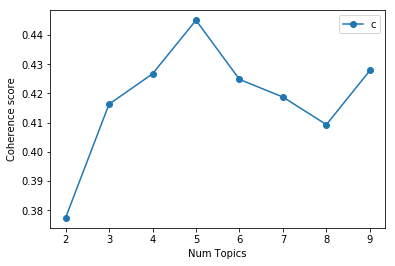

In [39]:
# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values, marker='o')
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [40]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))

Num Topics = 2  has Coherence Value of 0.377
Num Topics = 3  has Coherence Value of 0.416
Num Topics = 4  has Coherence Value of 0.427
Num Topics = 5  has Coherence Value of 0.445
Num Topics = 6  has Coherence Value of 0.425
Num Topics = 7  has Coherence Value of 0.419
Num Topics = 8  has Coherence Value of 0.409
Num Topics = 9  has Coherence Value of 0.428


## Finding the dominant topic in each sentence 

In [42]:
# Select the model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=9))

[(0,
  '0.149*"care" + 0.139*"home" + 0.043*"hospital" + 0.036*"patient" + '
  '0.036*"nursing" + 0.029*"dementia" + 0.029*"life" + 0.029*"elderly" + '
  '0.025*"put"'),
 (1,
  '0.141*"covid" + 0.130*"dementia" + 0.029*"risk" + 0.021*"health" + '
  '0.017*"condition" + 0.016*"increase" + 0.014*"show" + 0.014*"include" + '
  '0.014*"high"'),
 (2,
  '0.125*"death" + 0.123*"die" + 0.050*"covid" + 0.045*"cancer" + '
  '0.035*"heart" + 0.032*"disease" + 0.025*"people" + 0.021*"kill" + '
  '0.017*"number"'),
 (3,
  '0.061*"year" + 0.043*"day" + 0.038*"due" + 0.035*"week" + 0.029*"visit" + '
  '0.028*"mom" + 0.027*"today" + 0.026*"mother" + 0.024*"month"'),
 (4,
  '0.095*"people" + 0.058*"live" + 0.031*"support" + 0.025*"pandemic" + '
  '0.020*"family" + 0.019*"carer" + 0.018*"impact" + 0.016*"caregiver" + '
  '0.013*"research"'),
 (5,
  '0.105*"dementia" + 0.039*"virus" + 0.037*"corona" + 0.025*"bad" + '
  '0.025*"covid" + 0.018*"man" + 0.012*"good" + 0.011*"leave" + 0.011*"state"'),
 (6,
  

In [44]:
data = AllTweets['Text']
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

data = AllTweets['Text']

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(75)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0             0             7.0              0.2034   
1             1             7.0              0.1610   
2             2             7.0              0.1394   
3             3             8.0              0.1296   
4             4             8.0              0.1376   
5             5             3.0              0.1389   
6             6             2.0              0.1504   
7             7             2.0              0.1949   
8             8             3.0              0.1650   
9             9             1.0              0.1218   
10           10             2.0              0.2003   
11           11             5.0              0.1214   
12           12             2.0              0.2357   
13           13             2.0              0.1720   
14           14             6.0              0.1344   
15           15             2.0              0.1755   
16           16             6.0              0.1528   
17           17             2.0              0.1317   
18           18             0.0              0.1470   
19           19             8.0              0.1176   
20           20             5.0              0.1230   
21           21             3.0              0.1526   
22           22             6.0              0.1675   
23           23             2.0              0.1411   
24           24             6.0              0.1296   
25           25             0.0              0.1493   
26           26             2.0              0.2190   
27           27             8.0              0.1936   
28           28             3.0              0.1471   
29           29             3.0              0.1476   
..          ...             ...                 ...   
45           45             4.0              0.1962   
46           46             4.0              0.1993   
47           47             2.0              0.1658   
48           48             7.0              0.1399   
49           49             4.0              0.2101   
50           50             4.0              0.1876   
51           51             1.0              0.1964   
52           52             1.0              0.1416   
53           53             1.0              0.1402   
54           54             4.0              0.1316   
55           55             2.0              0.1894   
56           56             7.0              0.1452   
57           57             6.0              0.1402   
58           58             5.0              0.1594   
59           59             5.0              0.1385   
60           60             6.0              0.1562   
61           61             1.0              0.1573   
62           62             2.0              0.1374   
63           63             2.0              0.2121   
64           64             6.0              0.1708   
65           65             5.0              0.1374   
66           66             1.0              0.1385   
67           67             3.0              0.1493   
68           68             2.0              0.1707   
69           69             6.0              0.1333   
70           70             7.0              0.1852   
71           71             1.0              0.1356   
72           72             3.0              0.1566   
73           73             4.0              0.1254   
74           74             3.0              0.1508   

                                             Keywords  \
0   covid, dementia, test, work, patient, resident...   
1   covid, dementia, test, work, patient, resident...   
2   covid, dementia, test, work, patient, resident...   
3   dementia, covid, time, love, great, long, lose...   
4   dementia, covid, time, love, great, long, lose...   
5   year, day, due, week, visit, mom, today, mothe...   
6   death, die, covid, cancer, heart, disease, peo...   
7   death, die, covid, cancer, heart, disease, peo...   
8   year, day, due, week, visit, mom, today, mothe...   
9   covid, dementia, ri

In [ ]:
df_dominant_topic.head(75)

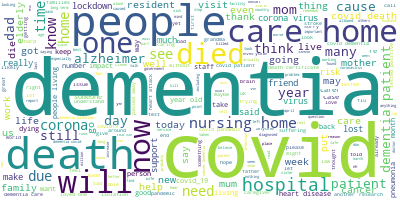

In [195]:
# import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(AllTweets['Text'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()